In [215]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [216]:
jaipur = pd.read_csv("./Dataset/Jaipur temperatures dataset.csv")
global_data = pd.read_csv("./Dataset/Global temperature dataset.csv")
ahmadabad = pd.read_csv("./Dataset/Ahmadabad.csv")
berlin = pd.read_csv("./Dataset/Berlin.csv")
houston = pd.read_csv("./Dataset/Houston.csv")

In [217]:
jaipur.head()

,year,city,country,avg_temp
0,1796,Jaipur,India,25.25
1,1797,Jaipur,India,26.77
2,1798,Jaipur,India,24.46
3,1799,Jaipur,India,25.51
4,1800,Jaipur,India,25.44


In [218]:
bool_series = pd.isnull(jaipur["avg_temp"])  

### Missing values found in Local City data

In [219]:
jaipur[bool_series]

,year,city,country,avg_temp
12,1808,Jaipur,India,NaN
13,1809,Jaipur,India,NaN
14,1810,Jaipur,India,NaN
15,1811,Jaipur,India,NaN
16,1812,Jaipur,India,NaN
62,1858,Jaipur,India,NaN
63,1859,Jaipur,India,NaN
64,1860,Jaipur,India,NaN
65,1861,Jaipur,India,NaN
66,1862,Jaipur,India,NaN


### Missing Value Imputation using Interploation Methond 

In [220]:
jaipur["avg_temp"] = jaipur["avg_temp"].interpolate()

In [221]:
jaipur_data = jaipur[["year","avg_temp"]]

In [222]:
jaipur_data["rolling_avg"] = jaipur_data["avg_temp"].rolling(window=10).mean()

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [223]:
jaipur_data.head()

,year,avg_temp,rolling_avg
0,1796,25.25,NaN
1,1797,26.77,NaN
2,1798,24.46,NaN
3,1799,25.51,NaN
4,1800,25.44,NaN


In [224]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [225]:
bool_series = pd.isnull(global_data["avg_temp"])  

### No Missing values found in Global Data

In [226]:
global_data[bool_series]

,year,avg_temp


In [227]:
global_data["rolling_avg"] = global_data["avg_temp"].rolling(window=10).mean()

In [228]:
global_data.head()

,year,avg_temp,rolling_avg
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN


### Line plot for Global Data

Text(0.5, 1.0, 'Global Temperature Graph with Rolling window 10')

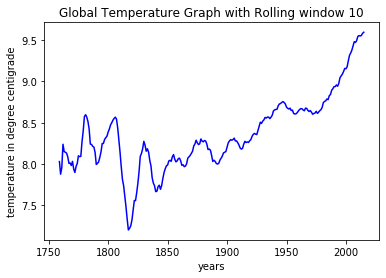

In [229]:
plt.plot(global_data["year"],global_data["rolling_avg"], color = "blue")
plt.xlabel('years')
plt.ylabel('temperature in degree centigrade')
plt.title("Global Temperature Graph with Rolling window 10")

### Line plot for Local City data Jaipur

Text(0.5, 1.0, 'Jaipur city Temperature Graph with Rolling window 10')

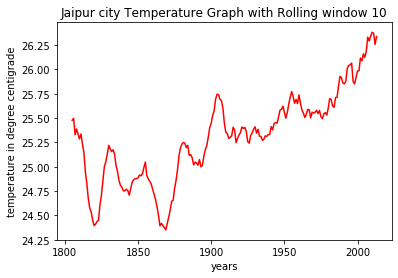

In [230]:
plt.plot(jaipur_data["year"],jaipur_data["rolling_avg"], color = "red")
plt.xlabel('years')
plt.ylabel('temperature in degree centigrade')
plt.title("Jaipur city Temperature Graph with Rolling window 10")

### Comparing both the plots

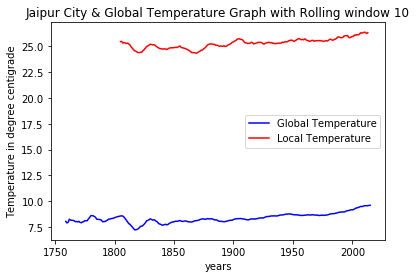

In [231]:
plt.plot(global_data["year"],global_data["rolling_avg"], color = "blue", label = "Global Temperature")
plt.plot(jaipur_data["year"],jaipur_data["rolling_avg"], color = "red",label = "Local Temperature")
plt.xlabel('years')
plt.ylabel('Temperature in degree centigrade')
plt.title("Jaipur City & Global Temperature Graph with Rolling window 10")
plt.legend()

### Finding Correlation between both the Temperatures

In [232]:
moving_averages = pd.DataFrame()
moving_averages["Global"] = global_data["rolling_avg"]
moving_averages["Jaipur"] = jaipur_data["rolling_avg"]
moving_averages.corr()

,Global,Jaipur
Global,1.000000,0.654481
Jaipur,0.654481,1.000000


### For Multiple Cities Around the world

In [233]:
ahmadabad = pd.read_csv("./Dataset/Ahmadabad.csv")
berlin = pd.read_csv("./Dataset/Berlin.csv")
houston = pd.read_csv("./Dataset/Houston.csv")

### Missing value check

In [234]:
bool_series = pd.isnull(ahmadabad["avg_temp"])  
ahmadabad[bool_series]

,year,city,country,avg_temp
12,1808,Ahmadabad,India,NaN
13,1809,Ahmadabad,India,NaN
14,1810,Ahmadabad,India,NaN
15,1811,Ahmadabad,India,NaN
16,1812,Ahmadabad,India,NaN
62,1858,Ahmadabad,India,NaN
63,1859,Ahmadabad,India,NaN
64,1860,Ahmadabad,India,NaN
65,1861,Ahmadabad,India,NaN
66,1862,Ahmadabad,India,NaN


In [235]:
bool_series = pd.isnull(berlin["avg_temp"])  
berlin[bool_series]

,year,city,country,avg_temp
3,1746,Berlin,Germany,NaN
4,1747,Berlin,Germany,NaN
5,1748,Berlin,Germany,NaN
6,1749,Berlin,Germany,NaN


In [236]:
bool_series = pd.isnull(houston["avg_temp"])  
houston[bool_series]

,year,city,country,avg_temp


### Missing Value Imputation

In [237]:
ahmadabad["avg_temp"] = ahmadabad["avg_temp"].interpolate()
berlin["avg_temp"] = berlin["avg_temp"].interpolate()

### Calculate Moving/Rolling Average

In [238]:
ahmadabad["rolling_avg"] = ahmadabad["avg_temp"].rolling(window=10).mean()
berlin["rolling_avg"] = berlin["avg_temp"].rolling(window=10).mean()
houston["rolling_avg"] = houston["avg_temp"].rolling(window=10).mean()

### Visualizaion

Text(0.5, 1.0, 'Ahmadabad city Temperature Graph with Rolling window 10')

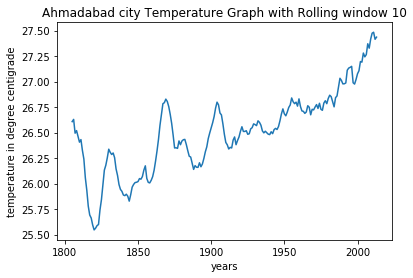

In [239]:
plt.plot(ahmadabad["year"],ahmadabad["rolling_avg"])
plt.xlabel('years')
plt.ylabel('temperature in degree centigrade')
plt.title("Ahmadabad city Temperature Graph with Rolling window 10")

Text(0.5, 1.0, 'Berlin city Temperature Graph with Rolling window 10')

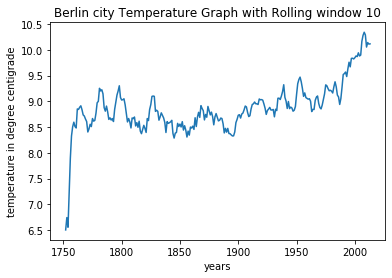

In [240]:
plt.plot(berlin["year"],berlin["rolling_avg"])
plt.xlabel('years')
plt.ylabel('temperature in degree centigrade')
plt.title("Berlin city Temperature Graph with Rolling window 10")

Text(0.5, 1.0, 'Houston city Temperature Graph with Rolling window 10')

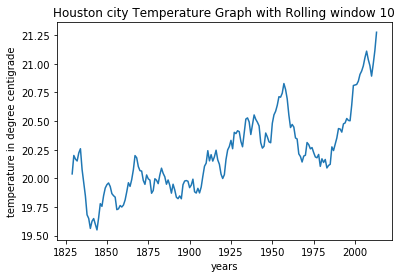

In [241]:
plt.plot(houston["year"],houston["rolling_avg"])
plt.xlabel('years')
plt.ylabel('temperature in degree centigrade')
plt.title("Houston city Temperature Graph with Rolling window 10")

### Comparision of Gobal and Local city data

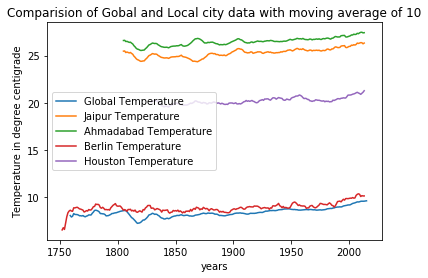

In [242]:
plt.plot(global_data["year"],global_data["rolling_avg"], label = "Global Temperature")
plt.plot(jaipur_data["year"],jaipur_data["rolling_avg"], label = "Jaipur Temperature")
plt.plot(ahmadabad["year"],ahmadabad["rolling_avg"], label = "Ahmadabad Temperature")
plt.plot(berlin["year"],berlin["rolling_avg"], label = "Berlin Temperature")
plt.plot(houston["year"],houston["rolling_avg"], label = "Houston Temperature")
plt.xlabel('years')
plt.ylabel('Temperature in degree centigrade')
plt.title("Comparision of Gobal and Local city data with moving average of 10")
plt.legend()

### Finding Correlation between Gobal Temperature and Local Cities Temperature

In [243]:
moving_averages = pd.DataFrame()
moving_averages["Global"] = global_data["rolling_avg"]
moving_averages["Jaipur"] = jaipur_data["rolling_avg"]
moving_averages["Ahmadabad"] = ahmadabad["rolling_avg"]
moving_averages["Berlin"] = berlin["rolling_avg"]
moving_averages["Houston"] = houston["rolling_avg"]
moving_averages.corr()

,Global,Jaipur,Ahmadabad,Berlin,Houston
Global,1.000000,0.654481,0.448251,0.699789,0.428565
Jaipur,0.654481,1.000000,0.834968,0.208252,0.707882
Ahmadabad,0.448251,0.834968,1.000000,0.170161,0.650249
Berlin,0.699789,0.208252,0.170161,1.000000,0.037380
Houston,0.428565,0.707882,0.650249,0.037380,1.000000
